# Environment Setup and Data Import

##	Import Required Libraries:

In [55]:
import pandas as pd
import numpy as np
# Importing libraries for text processing
import re
import nltk
from nltk.corpus import stopwords
import string
from nltk.stem import PorterStemmer
nltk.download('stopwords')

# Importing libraries for machine learning
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report

# Importing visualization libraries
import matplotlib.pyplot as plt
import seaborn as sb



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [56]:
df = pd.read_csv('/content/IMDB Dataset.csv', sep=',', engine='python', on_bad_lines='skip') # read the file as csv

# Data Preprocessing and Exploration

In [57]:
df.head(5)# read the first 5 rows of dataset


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [58]:
df.info()# display the basic information about data (null values, data type ...etc)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [59]:
df.shape


(50000, 2)


Class distribution:
sentiment
positive    25000
negative    25000
Name: count, dtype: int64


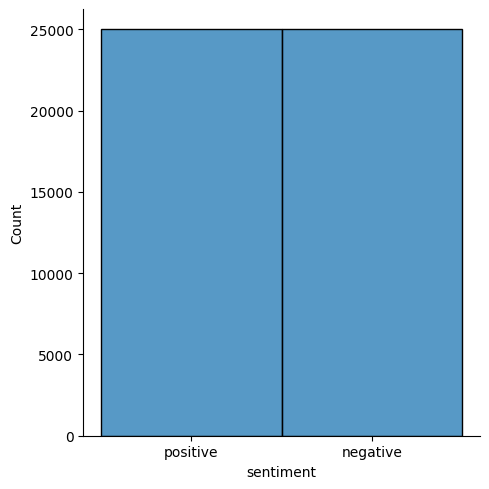

In [60]:
# show the distribution of each class
print("\nClass distribution:")
print(df['sentiment'].value_counts())
#visualize the distribution of each class
sb.displot(df, x=df["sentiment"])

In [61]:
from collections import Counter
stop_words = set(stopwords.words("english"))

def preprocess(text):
    text = re.sub(r"[^a-zA-Z\s]", "", text.lower())  # keep only letters
    words = [w for w in text.split() if w not in stop_words]
    return words

# Separate positive and negative reviews
pos_reviews = " ".join(df[df["sentiment"]=="positive"]["review"]).lower()
neg_reviews = " ".join(df[df["sentiment"]=="negative"]["review"]).lower()

pos_words = preprocess(pos_reviews)
neg_words = preprocess(neg_reviews)


In [62]:
pos_counts = Counter(pos_words).most_common(20)  # top 20 positive words
neg_counts = Counter(neg_words).most_common(20)  # top 20 negative words

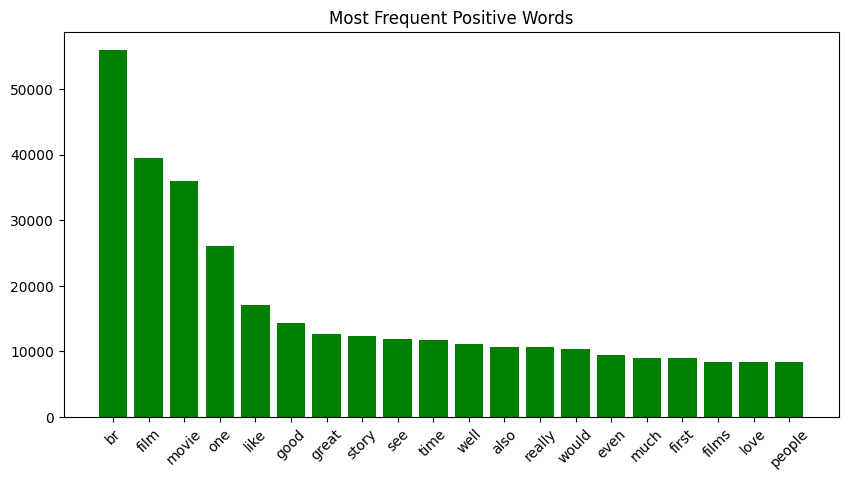

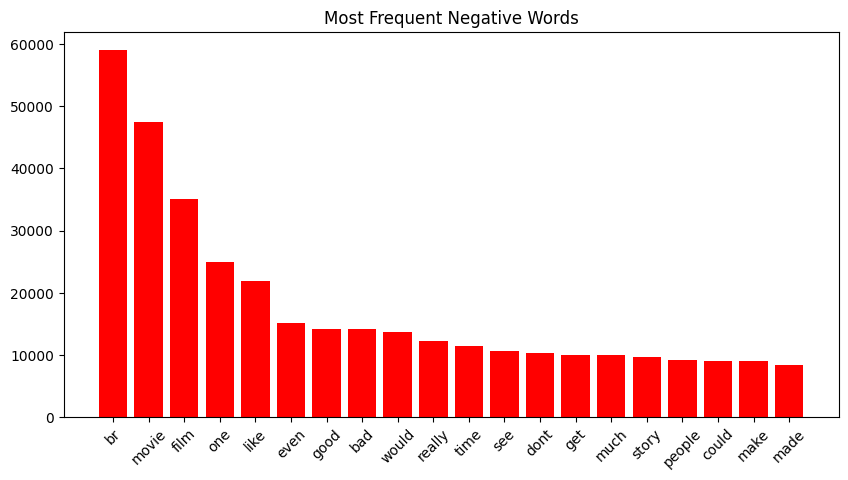

In [63]:
words, counts = zip(*pos_counts)
plt.figure(figsize=(10,5))
plt.bar(words, counts, color="green")
plt.title("Most Frequent Positive Words")
plt.xticks(rotation=45)
plt.show()

# Negative words
words, counts = zip(*neg_counts)
plt.figure(figsize=(10,5))
plt.bar(words, counts, color="red")
plt.title("Most Frequent Negative Words")
plt.xticks(rotation=45)
plt.show()

## 	Feature Engineering

In [64]:
# add new colum of review length
#df['length'] = df['review'].apply(len)
#print("\nDataset with length column:")
#print(df.head())# display dataset after adding new Colum


###	Text Cleaning

In [65]:
def clean_text(review):
    # Convert text to lowercase
    review = review.lower()
    # Remove punctuation using regex
    review = re.sub(r'[^\w\s]', '', review)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    review = ' '.join([word for word in review.split() if word not in stop_words])
    stemmer = PorterStemmer()
    review = ' '.join([stemmer.stem(word) for word in review.split()])
    return review

df['cleaned_review'] = df['review'].apply(clean_text)

In [66]:
df=df.drop(columns=['review'])

In [67]:
df

,sentiment,cleaned_review
0,positive,one review mention watch 1 oz episod youll hoo...
1,positive,wonder littl product br br film techniqu unass...
2,positive,thought wonder way spend time hot summer weeke...
3,negative,basic there famili littl boy jake think there ...
4,positive,petter mattei love time money visual stun film...
...,...,...
49995,positive,thought movi right good job wasnt creativ orig...
49996,negative,bad plot bad dialogu bad act idiot direct anno...
49997,negative,cathol taught parochi elementari school nun ta...
49998,negative,im go disagre previou comment side maltin one ...


# Data Preparation for Model Training

In [68]:
# Text vectorization
vectorizer = CountVectorizer()#intialize CountVectorizer
X = vectorizer.fit_transform(df['cleaned_review'])
X

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 4827025 stored elements and shape (50000, 142536)>

In [69]:
#Convert labels to numerical values (0 for negative, 1 for positive)
y = df['sentiment'].map({'negative': 0, 'positive': 1})
y


,sentiment
0,1
1,1
2,1
3,0
4,1
...,...
49995,1
49996,0
49997,0
49998,0


In [70]:
df

,sentiment,cleaned_review
0,positive,one review mention watch 1 oz episod youll hoo...
1,positive,wonder littl product br br film techniqu unass...
2,positive,thought wonder way spend time hot summer weeke...
3,negative,basic there famili littl boy jake think there ...
4,positive,petter mattei love time money visual stun film...
...,...,...
49995,positive,thought movi right good job wasnt creativ orig...
49996,negative,bad plot bad dialogu bad act idiot direct anno...
49997,negative,cathol taught parochi elementari school nun ta...
49998,negative,im go disagre previou comment side maltin one ...


###	Data Splitting

In [71]:
#Data splitting for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:" ,X_train.shape[0])# print the size of training data
print("Test set size:" ,X_test.shape[0])# print the size of testing data


Training set size: 40000
Test set size: 10000


## Model Training: Multinomial Naive Bayes

In [72]:
classifier = MultinomialNB(alpha=1.0)  # alpha=1.0 with Laplace smoothing
classifier.fit(X_train, y_train)# train the model


MultinomialNB()

In [73]:
#Optional part: Experiment with different alpha values
alphas = [0.1, 0.2, 0.5, 1.0, 1.5, 2.0]
for alpha in alphas:
  temp_classifier = MultinomialNB(alpha=alpha)
  temp_classifier.fit(X_train, y_train)
  score = temp_classifier.score(X_test, y_test)
  print("Alpha:",alpha ,"  " , "Accuracy:",score)


Alpha: 0.1    Accuracy: 0.8543
Alpha: 0.2    Accuracy: 0.8549
Alpha: 0.5    Accuracy: 0.8566
Alpha: 1.0    Accuracy: 0.857
Alpha: 1.5    Accuracy: 0.8583
Alpha: 2.0    Accuracy: 0.8582


In [74]:
y_pred = classifier.predict(X_test)


Accuracy: 0.857

Confusion Matrix:
[[4328  633]
 [ 797 4242]]


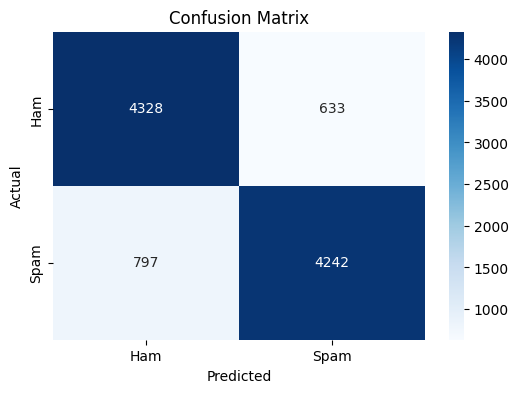

In [75]:
# Performance metrics
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Visualize confusion matrix
plt.figure(figsize=(6, 4))
sb.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [76]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split # Import train_test_split

clf = Pipeline([
    ("tfidf", TfidfVectorizer(max_features=20000, ngram_range=(1,2))),
    ("lr", LogisticRegression(max_iter=200, solver="lbfgs"))
])

# Split the data *before* applying the pipeline
X_train_text, X_test_text, y_train, y_test = train_test_split(df['cleaned_review'], y, test_size=0.2, random_state=42)

# Fit the pipeline on the text data
clf.fit(X_train_text, y_train)
print("Accuracy:", clf.score(X_test_text, y_test))

Accuracy: 0.8977
